In [5]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('C:\\Users\\thanm\\Downloads\\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
df.shape

(9994, 13)

In [10]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [11]:
df.drop('Country', axis =1, inplace = True)

In [12]:
df.drop('Postal Code', axis = 1, inplace = True)

In [13]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
df['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Deer Park          1
Pensacola          1
Margate            1
Antioch            1
Orland Park        1
Name: City, Length: 531, dtype: int64

In [16]:
df['City'].nunique()

531

In [17]:
df['State'].nunique()


49

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

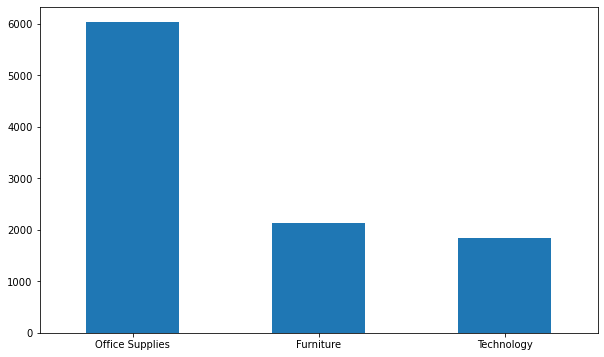

In [18]:
plt.figure(figsize = (10,6))
df['Category'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

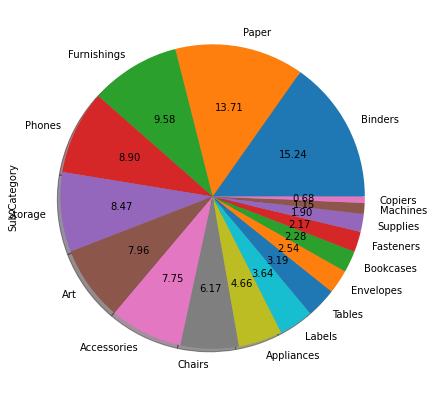

In [19]:
fig = plt.figure(figsize= (10,7))
df['Sub-Category'].value_counts().plot.pie(autopct = '%.2f',shadow = True)

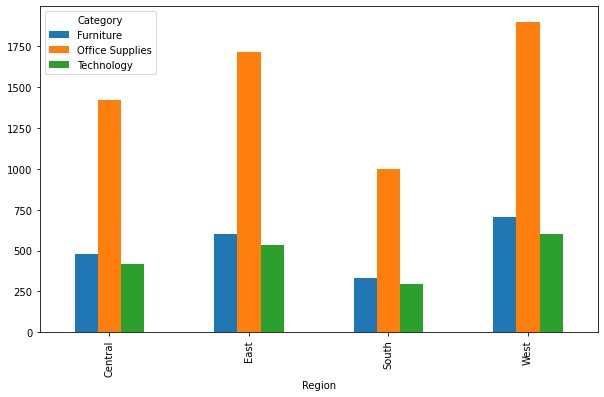

In [20]:
pd.crosstab(df['Region'],df['Category']).plot(kind = 'bar',figsize=(10,6))

In [21]:
df['%_profit'] = df['Profit'] / df['Sales'] * 100
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [22]:
print("MAXIMUM PROFIT")
max(df['%_profit'])

MAXIMUM PROFIT


50.0

In [23]:
print("MAXIMIM LOSS")
min(df['%_profit'])

MAXIMIM LOSS


-275.0

In [24]:
loss = df[df['%_profit'] < 0]
loss.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,%_profit
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.000000
14,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580,-180.000000
15,Standard Class,Home Office,Fort Worth,Texas,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160,-150.000000
23,Second Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Chairs,71.3720,2,0.30,-1.0196,-1.428571
27,Standard Class,Consumer,Philadelphia,Pennsylvania,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522,-54.000000


In [25]:
print("Total size of Loss data ")
loss.shape

Total size of Loss data 


(1871, 12)

In [26]:

print("total size of data")
df.shape

total size of data


(9994, 12)

In [27]:

1871/9994 * 100

18.721232739643785

In [28]:
profit_city = df.groupby("City").sum()['Profit']
profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [29]:
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

In [30]:
profit_city.sort_values(ascending = False).head()

City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Name: Profit, dtype: float64

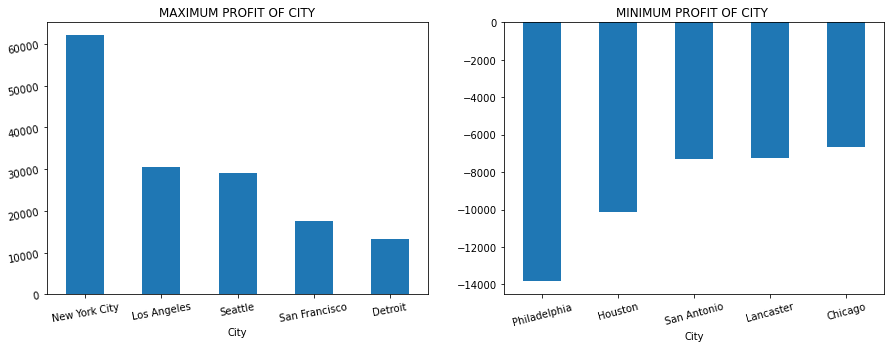

In [31]:
fig,axes = plt.subplots(1,2, figsize = (15,5))
profit_city.sort_values(ascending = False).head().plot(kind ='bar', ax = axes[0])
axes[0].tick_params(labelrotation = 10)
axes[0].set_title("MAXIMUM PROFIT OF CITY")
profit_city.sort_values(ascending = True).head().plot(kind='bar',ax = axes[1])
plt.xticks(rotation = 15)
plt.title("MINIMUM PROFIT OF CITY ")
plt.show()

In [32]:
state_profit = df.groupby('State').sum()['Profit']

Text(0.5, 1.0, 'STATE WISE PROFIT')

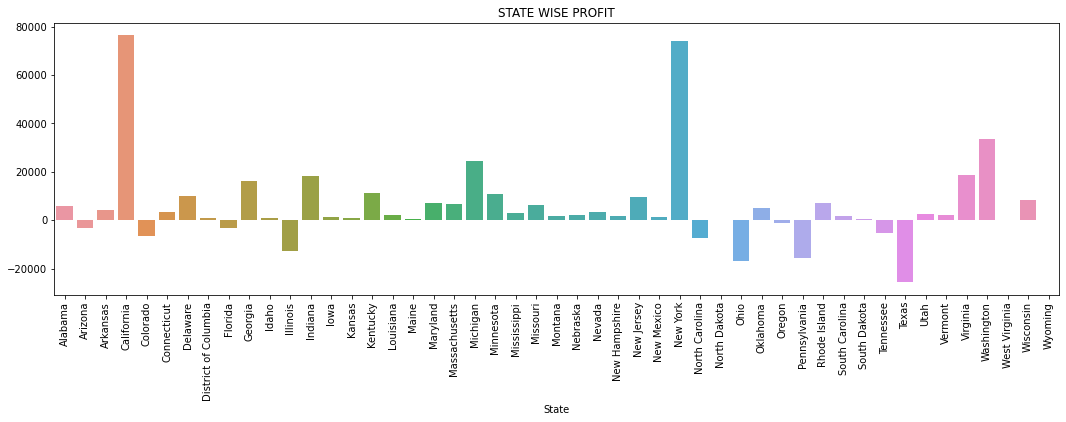

In [33]:
plt.figure(figsize =(18,5))
sns.barplot(x = state_profit.index, y=state_profit.values)
plt.xticks(rotation =90)
plt.title("STATE WISE PROFIT")

In [34]:
state_profit.sort_values(ascending = False).head(5)

State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Name: Profit, dtype: float64

In [35]:
df_state_profit = pd.DataFrame(state_profit)
type(df_state_profit)

pandas.core.frame.DataFrame

In [36]:
region_profit = pd.DataFrame(df.groupby('Region').sum()['Profit'])

<ipython-input-37-dbfa0f6befdc>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(region_profit, labels = region_profit.index, autopct= "%.2f", explode = (0.05,0.05,0.05,0.20),radius=1.5)


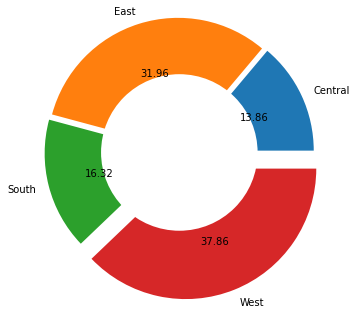

In [37]:
plt.pie(region_profit, labels = region_profit.index, autopct= "%.2f", explode = (0.05,0.05,0.05,0.20),radius=1.5)
centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

In [38]:
city_sale = pd.DataFrame(df.groupby('City').sum()['Sales'])
city_sale_sort = city_sale.sort_values(by= 'Sales',ascending = False).head(10)

<ipython-input-39-43610af5b8eb>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(city_sale_sort, labels = city_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)


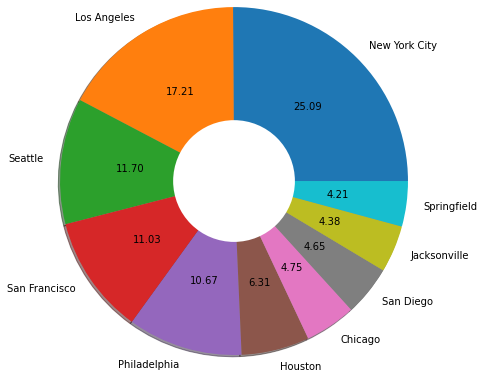

In [39]:
plt.pie(city_sale_sort, labels = city_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

In [40]:
state_sale = pd.DataFrame(df.groupby('State').sum()['Sales'])
state_sale_sort =state_sale.sort_values(by= 'Sales',ascending = False).head(10)

<ipython-input-41-e81760869ced>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(state_sale_sort, labels = state_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)


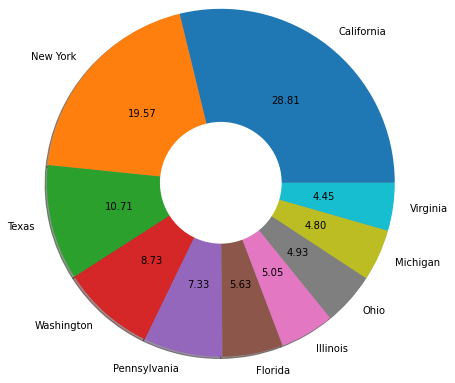

In [41]:
plt.pie(state_sale_sort, labels = state_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

In [42]:
region_sale = pd.DataFrame(df.groupby('Region').sum()['Sales'])
region_sale_sort =region_sale.sort_values(by= 'Sales',ascending = False).head(10)

<ipython-input-45-4aad63d84c27>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(region_sale_sort, labels = region_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)


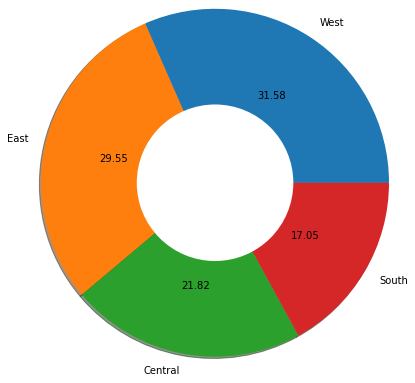

In [45]:
plt.pie(region_sale_sort, labels = region_sale_sort.index, autopct= "%.2f",shadow = True, radius = 2)
centre_circle = plt.Circle((0,0), 0.90, fc = 'white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)